# Probing eBay used car classifieds data

## Project overview

We'll work with a dataset of used cars from [eBay Kleinanzeigen](https://www.ebay-kleinanzeigen.de/), a classifieds section of the German eBay website, and we will use a reduced portion of the [original dataset](https://www.kaggle.com/orgesleka/used-cars-database/data).

## Goal

Practice data cleaning and exploration with Pandas.

## Tools
Python, Pandas, Matplotlib, Jupyter Lab

## Getting to know the data

The dataset features are described in Table 1.


**Table 1.** Dataset features.    

|feature              | meaning                                                                  |
|---------------------|--------------------------------------------------------------------------|
|dateCrawled          |When this ad was first crawled. All field-values are taken from this date |
|name                 |Name of the car                                                           |
|seller               |Whether the seller is private or a dealer                                 |
|offerType            |The type of listing                                                       | 
|price                |The price on the ad to sell the car                                       |
|abtest               |Whether the listing is included in an A/B test                            | 
|vehicleType          |The vehicle type                                                          |
|yearOfRegistration   |The year in which the car was first registered                            |
|gearbox              |The transmission type                                                     | 
|powerPS              |The power of the car in PS                                                |
|model                |The car model name                                                        |
|kilometer            |How many kilometers the car has driven                                    |
|monthOfRegistration  |The month in which the car was first registered                           |
|fuelType             |What type of fuel the car uses                                            |
|brand                |The brand of the car                                                      | 
|notRepairedDamage    |If the car has a damage which is not yet repaired                         |
|dateCreated          |The date on which the eBay listing was created                            |
|nrOfPictures         |The number of pictures in the ad                                          |
|postalCode           |The postal code for the location of the vehicle                           |
|lastSeenOnline       |When the crawler saw this ad last online                                  |


At first we'll import Pandas and NumPy libraries and read the dataset into Pandas.

In [1]:
import pandas as pd
import numpy as np

# reduced file
autos = pd.read_csv("autos.csv", encoding="Latin-1")

# original file available at Kaggle
autos_kaggle = pd.read_csv("autos_kaggle.csv", encoding="Latin-1")

Even though we'll use the reduced dataset we can compare its dimensionality with the original one.

In [2]:
print('Dimensionality of the reduced dataframe:', autos.shape)

Dimensionality of the reduced dataframe: (50000, 20)


In [3]:
print('Dimensionality of the original dataframe:', autos_kaggle.shape)

Dimensionality of the original dataframe: (371528, 20)


We also can print the first lines of the dataset.

In [4]:
# first lines of the reduced file
autos.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37


In [5]:
# shows information about dataframe
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

As we can see from the results above:
* The working dataset has dimensions of 50000 rows $\times$ 20 columns and is smaller than the original one.
* Most of the columns contain data as strings. 
* Some features as `price` and `odometer` also appear as objects but can be converted to numbers. 
* Columns names are written in camelcase and can be converted to snakecase since this is preferred by Python.
* A small part of the dataset is formed by null values. 

To convert column's names from camelcase to snakecase first we copy and edit them, and later we use the `Dataframe.columns`
to change their labels. 

## Data cleaning

In [6]:
list(autos.columns)

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'odometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'nrOfPictures',
 'postalCode',
 'lastSeen']

In [7]:
autos.columns = ['date_crawled',
                 'name',
                 'seller',
                 'offer_type',
                 'price',
                 'ab_test',
                 'vehicle_type',
                 'registration_year',
                 'gearbox',
                 'power_ps',
                 'model',
                 'odometer',
                 'registration_month',
                 'fuel_type',
                 'brand',
                 'unrepaired_damage',
                 'ad_created',
                 'num_of_pictures',
                 'postal_code',
                 'last_seen']

We can see the result printing the first lines of the dataset. The changes we made make it easier to read.

In [8]:
autos.head(3)

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37


We can print some descriptive statistics that sumarize the central tendency of the dataset.

In [9]:
autos.describe(include='all')
#autos.describe(exclude=[np.object])

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-19 17:36:18,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Each one of the columns:

* `seller`
* `offer_type`
* `ab_test`
* `gearbox` 

has only two unique values, and the column `num_of_pictures` seems to have only zeros.

Let's take a closer look at each one of them.

In [10]:
autos['seller'].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

In [11]:
autos['offer_type'].value_counts()

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

In [12]:
autos['ab_test'].value_counts()

test       25756
control    24244
Name: ab_test, dtype: int64

In [13]:
autos['gearbox'].value_counts()

manuell      36993
automatik    10327
Name: gearbox, dtype: int64

In [14]:
autos['num_of_pictures'].value_counts()

0    50000
Name: num_of_pictures, dtype: int64

As can be seen, each one of the columns `seller` and `offer_type` has nearly all the same values, so we can drop them.

And since the only value in column `num_of_pictures` is zero we can also drop it.

In [15]:
autos = autos.drop(['seller', 'offer_type', 'num_of_pictures'], axis=1)

In [16]:
autos.shape

(50000, 17)

The columns `price` and `odometer` are stored as text but store numeric values so we must remove non-numeric characters and convert them to the correct format.

In [17]:
autos['price'] = autos['price'].str.replace('$','').str.replace(',','')
autos['odometer'] = autos['odometer'].str.replace('km','').str.replace(',','')

Since we remove the unit _km_ from the individual values we can change the name of the column to keep this information.

In [18]:
autos.rename({"odometer":"odometer_km"}, axis=1, inplace=True)

In [19]:
autos['price'] = autos['price'].astype(int)
autos['odometer_km'] = autos['odometer_km'].astype(int)

The result  below shows the last modifications on our dataset.

In [20]:
print(autos.dtypes)

date_crawled          object
name                  object
price                  int32
ab_test               object
vehicle_type          object
registration_year      int64
gearbox               object
power_ps               int64
model                 object
odometer_km            int32
registration_month     int64
fuel_type             object
brand                 object
unrepaired_damage     object
ad_created            object
postal_code            int64
last_seen             object
dtype: object


In [21]:
autos.head(3)

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37


# Exploring the data: odometer_km and price

Let's analyze the data and look for any unrealistic behavior or outliers that could be removed.

First, we can see the number of unique values for the columns `price` and `odometer_km`

### Column `odometer_km`

In [22]:
autos['odometer_km'].unique().shape

(13,)

In [23]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [24]:
autos['odometer_km'].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

In [25]:
autos['odometer_km'].value_counts().sort_index(ascending=False)

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
40000       819
30000       789
20000       784
10000       264
5000        967
Name: odometer_km, dtype: int64

There are 13 unique values for `odometer_km` and the numbers are rounded what indicates that the field could be designed with pre-set options. Moreover, the mean greater than 125,000 shows that most cars present high mileage. The histogram plotted below illustrates it better (see **Figure 1**).

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(12,6))

ax.hist(autos['odometer_km'], bins=10)
ax.set_xlabel('kilometer driven', labelpad=20)
ax.tick_params(axis='both', which='both', length=5, width=1, direction='out', labelsize=14)
ax.set_xlim(left=0, right=160000)
ax.set_ylim(bottom=0, top=40000)
ax.xaxis.set_major_locator(ticker.MultipleLocator(40000))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(20000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10000))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5000))

ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='-')
ax.set_title('')

txt="Figure 1. Distribution of odometer readings."
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

<Figure size 1200x600 with 1 Axes>

### Column `price`

In [27]:
autos['price'].unique().shape

(2357,)

We can also look at some basic statistics.

In [28]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

Visualizing maximum and minimum values can also be helpful.

In [29]:
autos['price'].value_counts().head(10)

0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
Name: price, dtype: int64

In [30]:
autos['price'].value_counts().sort_index(ascending=True).head(10)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
Name: price, dtype: int64

In [31]:
autos['price'].value_counts().sort_index(ascending=False).head(10)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
Name: price, dtype: int64

There are 2357 unique values for `price` and the numbers in this field are also rounded. 

The results show that 1421 cars (2.8% of the dataset) have the minimum price equal to zero and we can remove them. The maximum price is equal to 100M dollars. We also can observe that there some prices below 30 dollars and some above one million. 

Since eBay in an auction site, it's acceptable that items have an opening bid lower as one dollar. However, we'll remove entries above 350k dollars.

In [32]:
autos = autos[autos['price'].between(1,351000)]

In [33]:
autos["price"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

In [34]:
autos.shape

(48565, 17)

**Figure 2** illustrates the price after removing entries above 350k dollars.

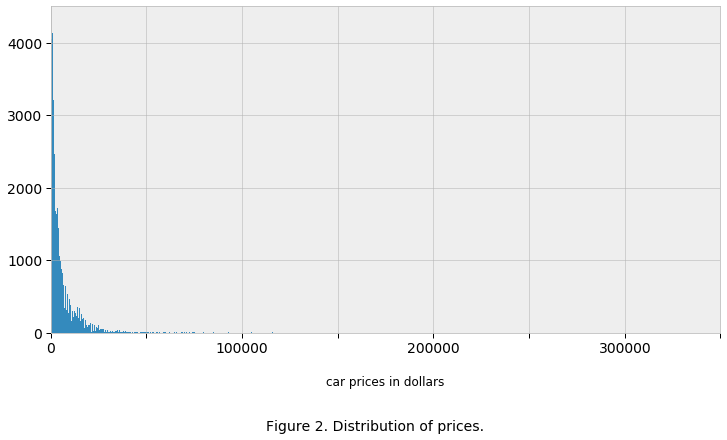

In [35]:
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(autos['price'], bins=1000)
ax.set_xlabel('car prices in dollars', labelpad=20)
ax.tick_params(axis='both', which='both', length=5, width=1, direction='out', labelsize=14)
ax.set_xlim(left=-0, right=350000)
ax.set_ylim(bottom=0, top=4500)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100000))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='-')


txt="Figure 2. Distribution of prices."
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

For the sake of clarity, we can build a plot only with higher prices (see **Figure 3**).

In [36]:
price_higher_values =  autos[autos['price'].between(50000,351000)]

In [37]:
price_higher_values.shape

(188, 17)

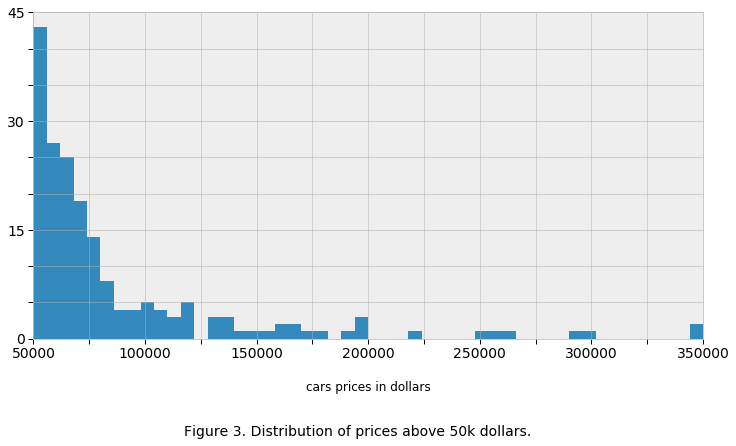

In [38]:
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(price_higher_values['price'], bins=50)
ax.set_xlabel('cars prices in dollars', labelpad=20)
ax.tick_params(axis='both', which='both', length=5, width=1, direction='out', labelsize=14)
ax.set_xlim(left=50000, right=350000)
ax.set_ylim(bottom=0, top=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50000))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(25000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(15))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='-')

txt="Figure 3. Distribution of prices above 50k dollars."
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

There are only 188 entries for the price above 50k dollars, i.e. less than 4% of the total dataset. Most prices are concentrated below 25k dollars and the average price is around 6k dollars.

## Analyzing date columns

The following columns store data values:
* `date_crawled` (added by crawler)
* `ad_created` (from the website)
* `last_seen` (added by crawler)
* `registration_year` (from the website)
* `registration_month` (from the website)

The first three attributes are recognized as string by pandas and we need to convert them to numerical values. Let's take a look how they are formated:

In [39]:
autos[['date_crawled', 'ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


The first ten characters of each feature above represent the day (_2016-04-06_), so we can select and analyze only them.

In [40]:
date_crawled = (autos['date_crawled']
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        )

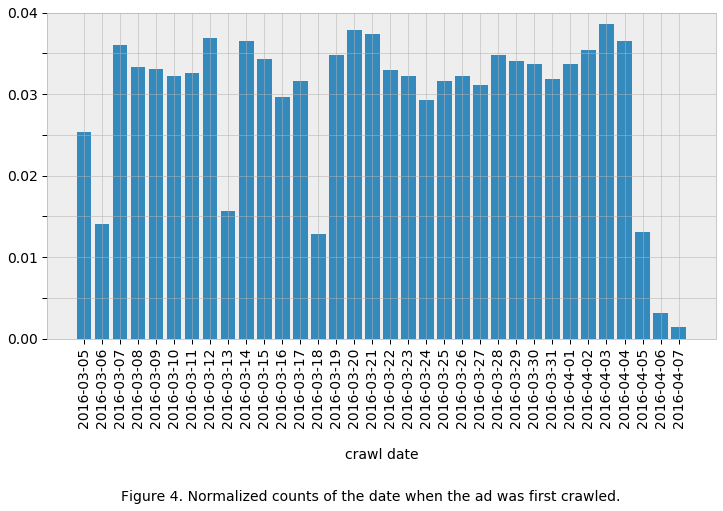

In [41]:
fig, ax = plt.subplots(figsize=(12,6))

bar_heights = date_crawled.values
bar_positions = date_crawled.index
ax.set_xlabel('crawl date', fontsize=14, labelpad=20)
ax.bar(bar_positions, bar_heights)
ax.tick_params(axis='x', which='both', length=5, width=1, direction='out', labelsize=14, labelrotation=90)
ax.tick_params(axis='y', which='both', length=5, width=1, direction='out', labelsize=14, labelrotation=0)
ax.set_ylim(bottom=0, top=0.040)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.010))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.005))
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='-')
txt="Figure 4. Normalized counts of the date when the ad was first crawled."
plt.figtext(0.5, -0.25, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

The plotted distribution on **Figure 4** shows that the site was daily crawled, almost uniformly, for one month.

In [42]:
ad_created = (autos['ad_created']
             .str[:10]
             .value_counts(normalize=True, dropna=False)
             .sort_index()
             )

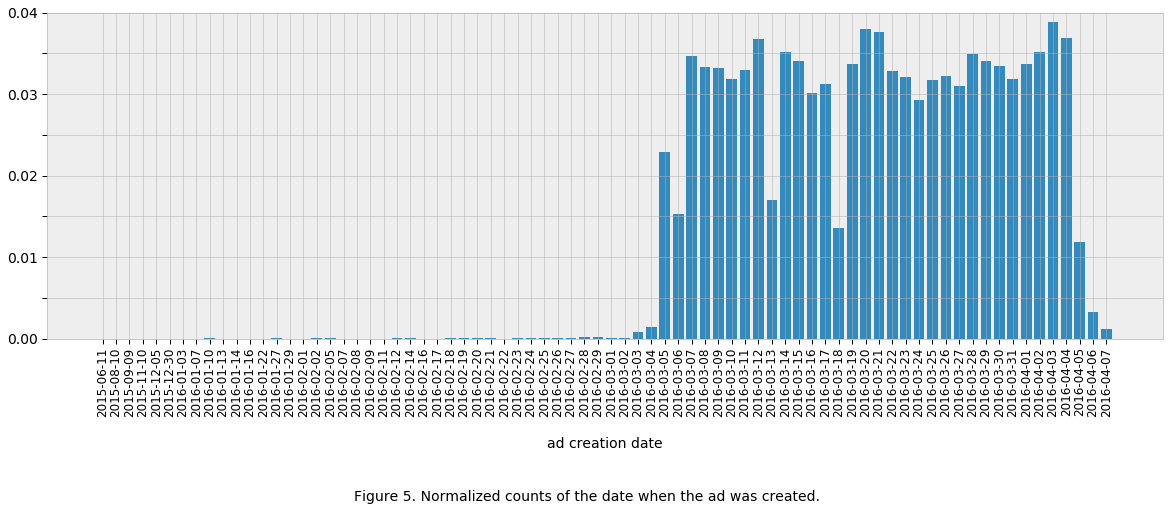

In [43]:
fig, ax = plt.subplots(figsize=(20,6))

bar_heights = ad_created.values
bar_positions = ad_created.index
ax.set_xlabel('ad creation date', fontsize=14, labelpad=20)
ax.bar(bar_positions, bar_heights)
ax.tick_params(axis='x', which='both', length=5, width=1, direction='out', labelsize=12, labelrotation=90)
ax.tick_params(axis='y', which='both', length=5, width=1, direction='out', labelsize=14, labelrotation=0)
ax.set_ylim(bottom=0, top=0.040)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.010))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.005))
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='-')
txt="Figure 5. Normalized counts of the date when the ad was created."
plt.figtext(0.5, -0.25, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

From **Figure 5** we can observe that the ad creation dates are not uniform during the entire period covered by the dataset. Their creation is concentrated on the last two months of the records.

In [44]:
last_seen = (autos['last_seen']
            .str[:10]
            .value_counts(normalize=True, dropna=False)
            .sort_index()
            )

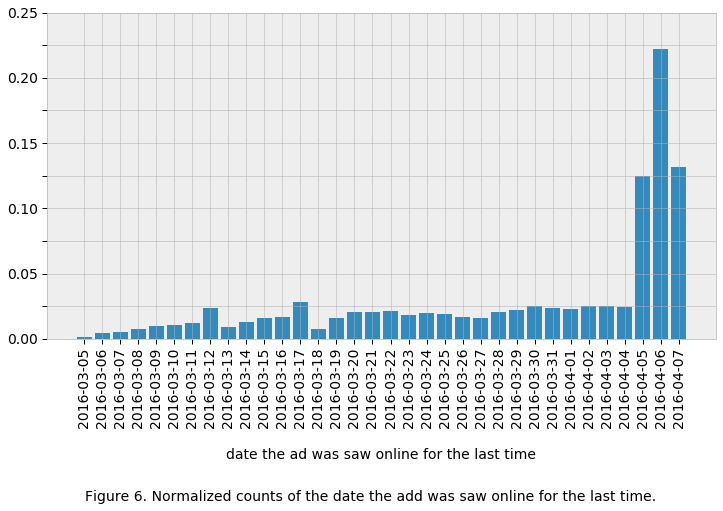

In [45]:
fig, ax = plt.subplots(figsize=(12,6))

bar_heights = last_seen.values
bar_positions = last_seen.index
ax.set_xlabel('date the ad was saw online for the last time', fontsize=14, labelpad=20)
ax.bar(bar_positions, bar_heights)
ax.tick_params(axis='x', which='both', length=5, width=1, direction='out', labelsize=14, labelrotation=90)
ax.tick_params(axis='y', which='both', length=5, width=1, direction='out', labelsize=14, labelrotation=0)
ax.set_ylim(bottom=0, top=0.25)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='-')
txt="Figure 6. Normalized counts of the date the add was saw online for the last time."
plt.figtext(0.5, -0.25, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

The `last_seen` on the list means that the ad was removed and car was probably sold (see **Figure 6**). The values observed for the last three days are greater than the average for the feature and could be associated with an anomaly rather than a sudden increase in sales.

## Handling incorrect data records for the year

In [46]:
autos['registration_year'].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

The registration year, as the name suggests, represents the year that the car was first registered and also is an indication of its age (see **Figure 7**). The minimum and maximum values are 1000 and 9999 respectively. This is a strange finding considering that the cars were invented after the year 1000 and that the year 9999 is in a distant future.

In [47]:
year_of_registration = (autos['registration_year']
                        .value_counts(normalize=True, dropna=False)
                        .sort_index()
                       )

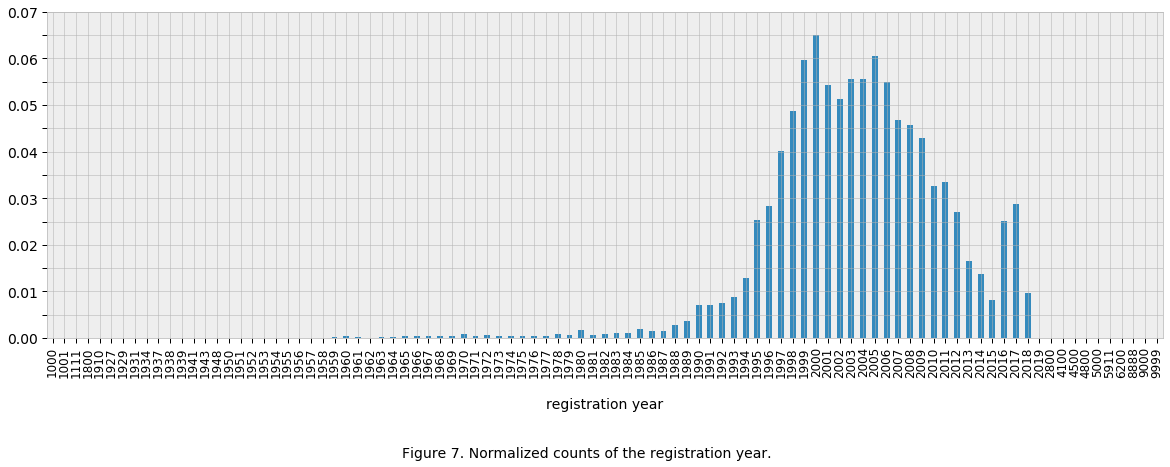

In [48]:
fig = plt.figure(figsize=(20,6))
ax = year_of_registration.plot.bar()
ax.set_xlabel('registration year', fontsize=14, labelpad=20)
ax.tick_params(axis='x', which='both', length=5, width=1, direction='out', labelsize=12, labelrotation=90)
ax.tick_params(axis='y', which='both', length=5, width=1, direction='out', labelsize=14, labelrotation=0)
ax.set_ylim(bottom=0, top=0.07)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.005))
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='-')
txt="Figure 7. Normalized counts of the registration year."
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

We can separate the registration year into two plots, one including the years from 1000 to 1900 (**Figure 8**) and the other the years from 2019 to 9999 (**Figure 9**).

In [49]:
year_lower_values = autos[autos['registration_year'].between(1000,1900)]

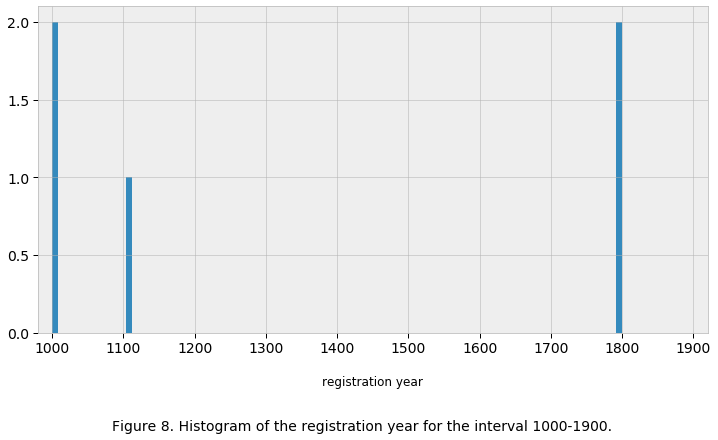

In [50]:
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(year_lower_values['registration_year'], bins=100)
ax.set_xlabel('registration year', labelpad=20)
ax.tick_params(axis='both', which='both', length=5, width=1, direction='out', labelsize=14)
ax.set_xlim(left=980, right=1920)
#ax.set_ylim(bottom=0, top=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(25000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='-')

txt="Figure 8. Histogram of the registration year for the interval 1000-1900."
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

In [51]:
year_lower_values['registration_year'].shape

(5,)

For the years 1000 to 1900 there are only 5 entries.

In [52]:
year_higher_values = autos[autos['registration_year'].between(2019,9999)]

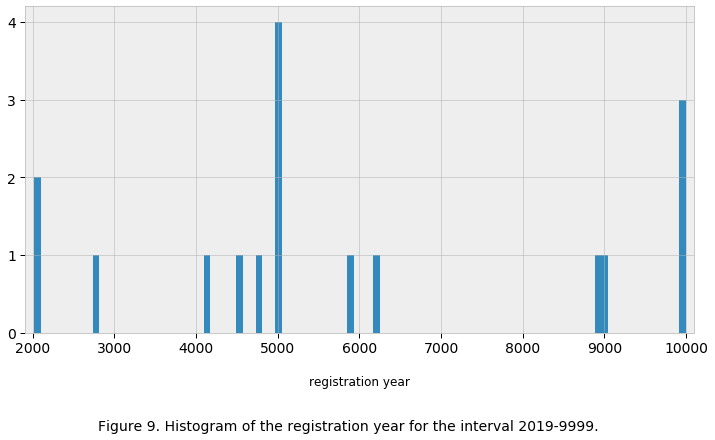

In [53]:
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(year_higher_values['registration_year'], bins=100)
ax.set_xlabel('registration year', labelpad=20)
ax.tick_params(axis='both', which='both', length=5, width=1, direction='out', labelsize=14)
ax.set_xlim(left=1900, right=10100)
#ax.set_ylim(bottom=0, top=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(25000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='-')

txt="Figure 9. Histogram of the registration year for the interval 2019-9999."
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

In [54]:
year_higher_values['registration_year'].shape

(17,)

For the years 2019 to 9999 there are only 17 entries.

In [55]:
print("The percentage each time interval contributes to the dataset is given below:\n")
print(f"   >>> from 1900 to 2016: {((autos['registration_year'].between(1900,2016)).sum()/autos.shape[0])*100:6.2f} %")
print(f"   >>> other entries: {((~autos['registration_year'].between(1900,2016)).sum()/autos.shape[0])*100:10.2f} %")

The percentage each time interval contributes to the dataset is given below:

   >>> from 1900 to 2016:  96.12 %
   >>> other entries:       3.88 %


From the results above we can observe that around 96% of all cars were registered between 1900 and 2016. The entries outside this interval correspond to less than 4% of the data and then can be removed.

In [56]:
# update the dataframe
autos = autos[autos['registration_year'].between(1900,2016)]

We can take a brief analysis of the cleaned dataset and generate some basic statistics.

In [57]:
autos.shape

(46681, 17)

In [58]:
autos.describe()

,price,registration_year,power_ps,odometer_km,registration_month,postal_code
count,46681.000000,46681.000000,46681.000000,46681.000000,46681.000000,46681.000000
mean,5977.716801,2002.910756,117.892933,125586.855466,5.827125,51097.434181
std,9177.909479,7.185103,184.922911,39852.528628,3.670300,25755.387192
min,1.000000,1910.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1250.000000,1999.000000,75.000000,100000.000000,3.000000,30827.000000
50%,3100.000000,2003.000000,109.000000,150000.000000,6.000000,49828.000000
75%,7500.000000,2008.000000,150.000000,150000.000000,9.000000,71732.000000
max,350000.000000,2016.000000,17700.000000,150000.000000,12.000000,99998.000000


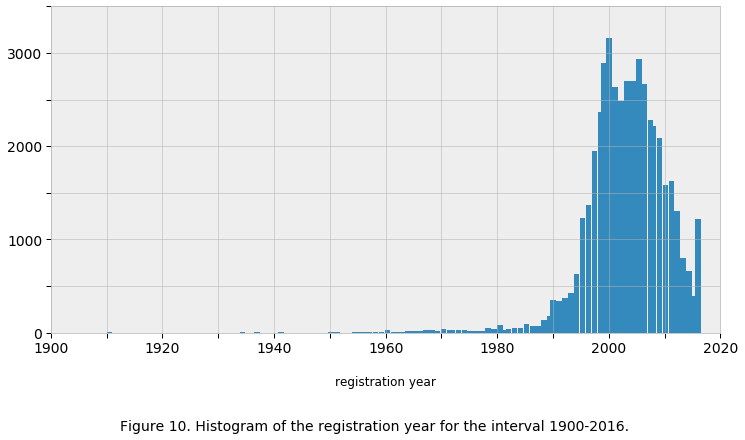

In [59]:
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(autos['registration_year'], bins=200, width=1)
ax.set_xlabel('registration year', labelpad=20)
ax.tick_params(axis='both', which='both', length=5, width=1, direction='out', labelsize=14)
ax.set_xlim(left=1900, right=2020)
ax.set_ylim(bottom=0, top=3500)
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(500))
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='-')

txt="Figure 10. Histogram of the registration year for the interval 1900-2016."
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

After removing unrealistic data, we can see from **Figure 10** that most of the cars were registered in the past 20 years.

## Analysing price by brand

In [60]:
autos['brand'].describe()

count          46681
unique            40
top       volkswagen
freq            9862
Name: brand, dtype: object

The dataset contains a total of 40 car brands, listed below.

In [61]:
autos['brand'].unique()

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'seat', 'renault', 'mercedes_benz', 'audi', 'sonstige_autos',
       'opel', 'mazda', 'porsche', 'mini', 'toyota', 'dacia', 'nissan',
       'jeep', 'saab', 'volvo', 'mitsubishi', 'jaguar', 'fiat', 'skoda',
       'subaru', 'kia', 'citroen', 'chevrolet', 'hyundai', 'honda',
       'daewoo', 'suzuki', 'trabant', 'land_rover', 'alfa_romeo', 'lada',
       'rover', 'daihatsu', 'lancia'], dtype=object)

In [62]:
brand_counts_norm = autos['brand'].value_counts(normalize=True)

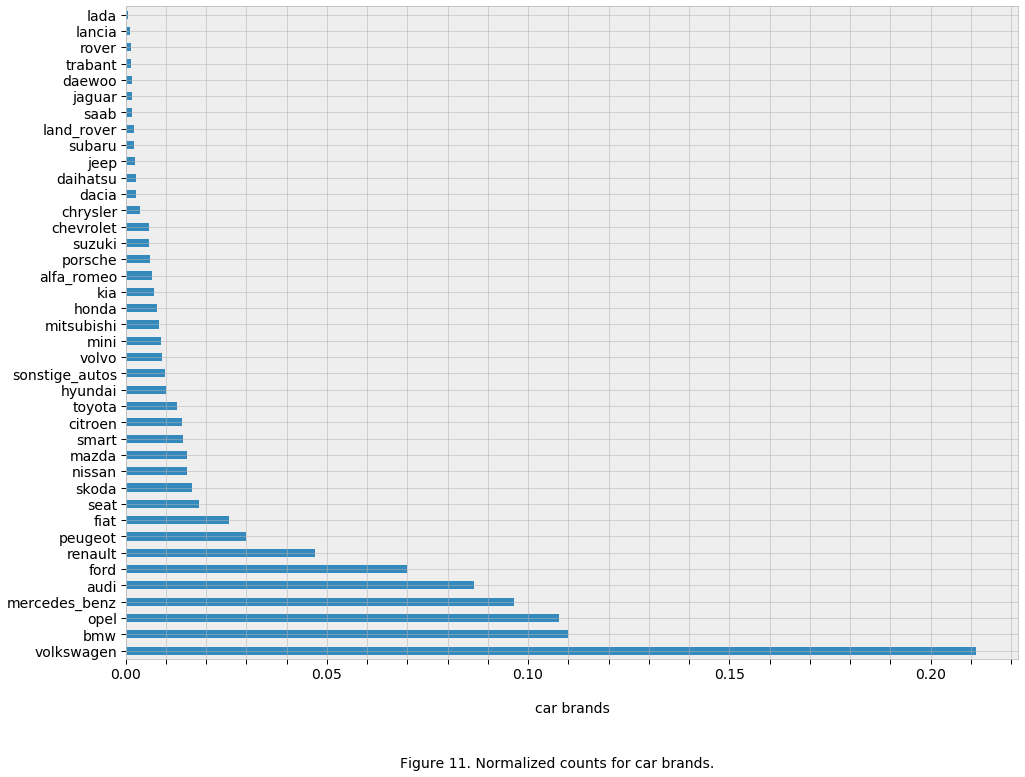

In [63]:
fig = plt.figure(figsize=(16,12))
ax = brand_counts_norm.plot.barh()
ax.set_xlabel('car brands', fontsize=14, labelpad=20)
ax.tick_params(axis='x', which='both', length=5, width=1, direction='out', labelsize=14, labelrotation=0)
ax.tick_params(axis='y', which='both', length=5, width=1, direction='out', labelsize=14, labelrotation=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='-')
txt="Figure 11. Normalized counts for car brands."
plt.figtext(0.5, 0, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

The first six places in this list are occupied by German makers and Volkswagen is on the top of the rank. Most of the brands have a small slice of the total. In our analysis, we can consider only brands present in more than 5% of the list.

In [64]:
most_common_brands = brand_counts_norm[brand_counts_norm > 0.05]
most_common_brands

volkswagen       0.211264
bmw              0.110045
opel             0.107581
mercedes_benz    0.096463
audi             0.086566
ford             0.069900
Name: brand, dtype: float64

In [65]:
most_common_brands_index = most_common_brands.index
most_common_brands_index

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

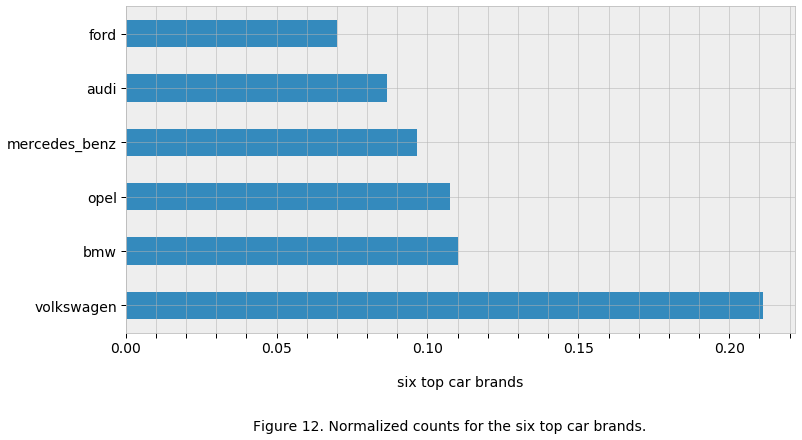

In [66]:
fig = plt.figure(figsize=(12,6))
ax = most_common_brands.plot.barh()
ax.set_xlabel('six top car brands', fontsize=14, labelpad=20)
ax.tick_params(axis='x', which='both', length=5, width=1, direction='out', labelsize=14, labelrotation=0)
ax.tick_params(axis='y', which='both', length=5, width=1, direction='out', labelsize=14, labelrotation=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='-')
txt="Figure 12. Normalized counts for the six top car brands."
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

In [67]:
brand_price = {}      # stores the prices of the top six brands

brands = autos['brand'].unique()

for brand in most_common_brands_index:
    selected_rows = autos[autos['brand'] == brand]
    average_price = selected_rows['price'].mean()
    brand_price[brand] = int(average_price)

In [68]:
brand_price

{'volkswagen': 5402,
 'bmw': 8332,
 'opel': 2975,
 'mercedes_benz': 8628,
 'audi': 9336,
 'ford': 3749}

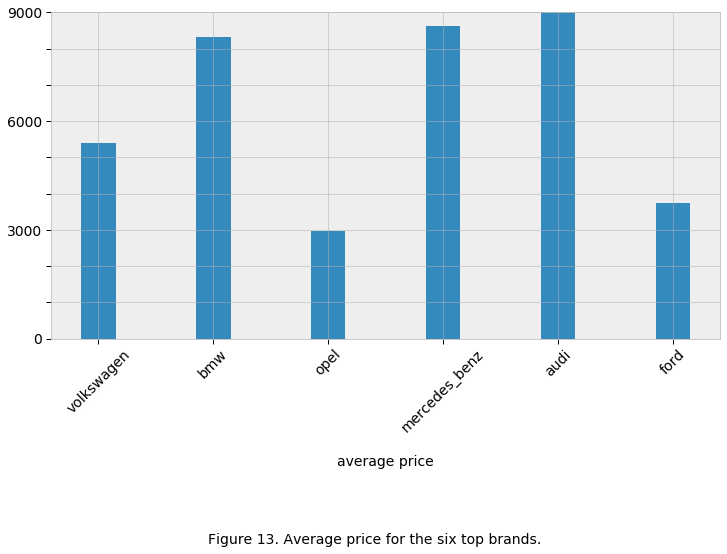

In [69]:
fig, ax = plt.subplots(figsize=(12,6))

bar_heights = brand_price.values()
bar_positions = brand_price.keys()
ax.set_xlabel('average price', fontsize=14, labelpad=20)
ax.bar(bar_positions, bar_heights, width=0.3)
ax.tick_params(axis='x', which='both', length=5, width=1, direction='out', labelsize=14, labelrotation=45)
ax.tick_params(axis='y', which='both', length=5, width=1, direction='out', labelsize=14, labelrotation=0)
ax.set_ylim(bottom=0, top=9000)
ax.yaxis.set_major_locator(ticker.MultipleLocator(3000))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1000))
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='-')
txt="Figure 13. Average price for the six top brands."
plt.figtext(0.5, -0.35, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

* The most expensive brands are  Audi, Mercedes Benz, and BMW. 
* Ford and Open are the less expensive ones.
* Volkswagen is in between.

## Mileage $\times$ price

We can also investigate how mileage influences the price for the six top brands. For this, we can combine both features in a new dataframe using _pandas series constructor_ and _pandas dataframe constructor_.

In [70]:
brand_price_series = pd.Series(brand_price)

In [71]:
brand_price_series

volkswagen       5402
bmw              8332
opel             2975
mercedes_benz    8628
audi             9336
ford             3749
dtype: int64

In [72]:
pd.DataFrame(brand_price_series, columns=['average_price'])

,average_price
volkswagen,5402
bmw,8332
opel,2975
mercedes_benz,8628
audi,9336
ford,3749


In [73]:
brand_mileage = {}

for brand in most_common_brands_index:
    selected_rows = autos[autos['brand'] ==  brand]
    average_mileage = selected_rows['odometer_km'].mean()
    brand_mileage[brand] = int(average_mileage)
    
average_mileage = pd.Series(brand_mileage).sort_values(ascending=False)
average_prices = pd.Series(brand_price).sort_values(ascending=False)

In [74]:
brand_data = pd.DataFrame(average_mileage, columns=['average_mileage'])
brand_data

,average_mileage
bmw,132572
mercedes_benz,130788
opel,129310
audi,129157
volkswagen,128707
ford,124266


In [75]:
brand_data['average_price'] = average_prices
brand_data

,average_mileage,average_price
bmw,132572,8332
mercedes_benz,130788,8628
opel,129310,2975
audi,129157,9336
volkswagen,128707,5402
ford,124266,3749


The average mileage do not change as the prices for the top six brands. Stronger brands are more expensive even their cars present higher mileage.

In [76]:
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


## Translating German to English

Since the dataset words are written in German, we can translate it into English, but before that, we must identify these words.

In [77]:
autos['vehicle_type'].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

In [78]:
autos['gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [79]:
autos['fuel_type'].unique()

array(['lpg', 'benzin', 'diesel', nan, 'cng', 'hybrid', 'elektro',
       'andere'], dtype=object)

In [80]:
autos['unrepaired_damage'].unique()

array(['nein', nan, 'ja'], dtype=object)

The  entries in the features `vehicle_type`, `gearbox`, `fuel_type` and `unrepaired_damage` are in German, so we can translate then to English.

In [81]:
autos['vehicle_type'] = (autos['vehicle_type'].replace('kleinwagen','small car')
                                              .replace('kombi','station wagon')
                                              .replace('cabrio','convertible')
                                              .replace('andere','other')
                                              )

In [82]:
autos['gearbox'] = (autos['gearbox'].replace('manuell','manual')
                                    .replace('automatik','automatic')
                                    )

In [83]:
autos['fuel_type'] = (autos['fuel_type'].replace('benzin','gasolin')
                                        .replace('elektro','electric')
                                        .replace('andere','other')
                                        )

In [84]:
autos['unrepaired_damage'] = (autos['unrepaired_damage'].replace('nein','no')
                                                        .replace('ja','yes')
                                                        )

In [85]:
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manual,158,andere,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatic,286,7er,150000,6,gasolin,bmw,no,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manual,102,golf,70000,7,gasolin,volkswagen,no,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,small car,2007,automatic,71,fortwo,70000,6,gasolin,smart,no,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,station wagon,2003,manual,0,focus,150000,7,gasolin,ford,no,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


## Simplifying date format

We can also convert the dates in `date_crawled`, `ad_created` and `last_seen` to the integer format `20160321`.

In [86]:
autos['date_crawled'] = autos['date_crawled'].str[:10].str.replace("-","").astype(int)

In [87]:
autos['ad_created'] = autos['ad_created'].str[:10].str.replace("-","").astype(int)

In [88]:
autos['last_seen'] = autos['last_seen'].str[:10].str.replace("-","").astype(int)

In [89]:
autos.head(3)

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,20160326,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manual,158,andere,150000,3,lpg,peugeot,no,20160326,79588,20160406
1,20160404,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatic,286,7er,150000,6,gasolin,bmw,no,20160404,71034,20160406
2,20160326,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manual,102,golf,70000,7,gasolin,volkswagen,no,20160326,35394,20160406


## Relationship between damage and vehicle price

In [90]:
autos.loc[:,['price','unrepaired_damage']].head()

,price,unrepaired_damage
0,5000,no
1,8500,no
2,8990,no
3,4350,no
4,1350,no


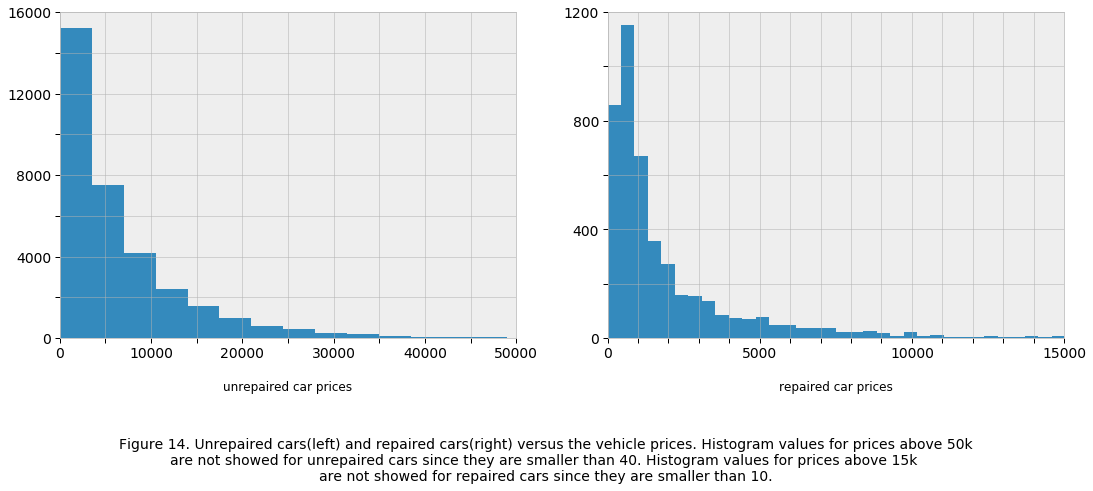

In [230]:
# separate 'yes' from 'no' classes
autos_damaged = autos[autos['unrepaired_damage']=='yes']
autos_undamaged = autos[autos['unrepaired_damage']=='no']

fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(autos_undamaged["price"], bins=100)
ax2.hist(autos_damaged["price"], bins=100)


ax1.set_xlabel('unrepaired car prices', labelpad=20)
ax1.tick_params(axis='both', which='both', length=5, width=1, direction='out', labelsize=14)
ax1.set_xlim(left=0, right=50000)
ax1.set_ylim(bottom=0, top=16000)
#ax1.set_xlim(left=50000, right=360000)
#ax1.set_ylim(bottom=0, top=40)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10000))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(5000))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(4000))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2000))
ax1.grid(which='major', linestyle='-')
ax1.grid(which='minor', linestyle='-')

ax2.set_xlabel('repaired car prices', labelpad=20)
ax2.tick_params(axis='both', which='both', length=5, width=1, direction='out', labelsize=14)
ax2.set_xlim(left=0, right=15000)
ax2.set_ylim(bottom=0, top=1200)
#ax2.set_xlim(left=15000, right=45000)
#ax2.set_ylim(bottom=0, top=10)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(5000))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(1000))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(400))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(200))
ax2.grid(which='major', linestyle='-')
ax2.grid(which='minor', linestyle='-')

txt='''Figure 14. Unrepaired cars(left) and repaired cars(right) versus the vehicle prices. Histogram values for prices above 50k
are not showed for unrepaired cars since they are smaller than 40. Histogram values for prices above 15k 
are not showed for repaired cars since they are smaller than 10.''' 
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

The dataset contains much more unrepaired vehicles than repaired ones, and how we would expect, cars without damage are more expensive.